<div class="alert alert-block alert-success">

## PROJECT PROPOSAL: CSCI 4146 and CSCI 6409
    
### Team:
#### 1. Imaad Amyn Rajan
#### 2. Smriti Jha
#### 3. Aswini Anand
#### 4. Sumadhur Vaidyula
#### 5. Arunkumar Subash Gauda

### DOMAIN: Banking and financial Industry.
    
### PROBLEM STATEMENT:

In Banking and financial Industry, asset portfolio majorly determines the revenue and profit of the institution. Hence there is a need to lend good quality assets and often, management is under great pressure for the same.

Our bank, ABC Bank, is also facing losses due to lending of loans that default, badly affecting the image of the bank. We intend to create a solution that can predict the probability of a loan going default based on historical data so that Bank can decide on whether to lend to a customer or not based on the results. This will in turn increase profitability and improve reputation of ABC Bank in the industry.

The dataset we propose to use is Berka dataset for financial institution. The problem looks into how many loans have turned bad (where customer couldn’t repay) from already available data and predicts whether a loan will turn bad or not for new customers. If it will turn bad, ABC bank may choose not to lend him/her. This is a binary classification problem that classifies a loan as good (quality asset) or bad(default).

The database we propose to use was prepared by Petr Berka and Marta Sochorova.The Berka dataset or PKDD’99 Financial Dataset is a collection of anonymized financial information from a Czech bank. The dataset has over 5,300 bank clients with approximately 1,000,000 transactions. Additionally, the bank represented in the dataset has extended around 700 loans and issued nearly 900 credit cards, all of which are in the data. There are 8 raw files in the dataset containing 8 tables with information as below:

#### • Account (account.asc)
#### • Client (client.asc)
#### • Disposition (disp.asc)
#### • Permanent Order (order.asc)
#### • Transaction (trans.asc)
#### • Loan (loan.asc)
#### • credit card (card.asc)
#### • Demographic data (district.asc)

### DATASET LINK: https://github.com/zhouxu-ds/loan-default-prediction

### INSPIRATION:
#### Kaggle.com
#### Github.com
#### Towardsdatascience.com
#### Data.world

### REFERENCE:
#### https://towardsdatascience.com/loan-default-prediction-for-profit-maximization-45fcd461582b
#### https://towardsdatascience.com/loan-default-prediction-an-end-to-end-ml-project-with-real-bank-data-part-1-1405f7aecb9e#447b
#### https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions
</div>

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

<div class="alert alert-block alert-danger">
    <b>1. Data Loading</b>
</div>

In [2]:
account_data = pd.read_csv("data/account.asc", header=0, sep=';', engine='python')
card_data = pd.read_csv("data/card.asc", header=0, sep=';', engine='python')
client_data = pd.read_csv("data/client.asc", header=0, sep=';', engine='python')
disp_data = pd.read_csv("data/disp.asc", header=0, sep=';', engine='python')
district_data = pd.read_csv("data/district.asc", header=0, sep=';', engine='python')
loan_data = pd.read_csv("data/loan.asc", header=0, sep=';', engine='python')
order_data = pd.read_csv("data/order.asc", header=0, sep=';', engine='python')
trans_data = pd.read_csv("data/trans.asc", header=0, sep=';', engine='python')

<div class="alert alert-block alert-danger">
    <b>2. Data Cleaning</b>
</div>

In [3]:
def birth_number_to_dob_n_gender(birth_number):
    '''
    Use to convert birth number to date of birth and gender
    
    Parameters
    ----------
    birth_number:string birth_number to be provided.
    '''
    yy = birth_number[0:2]
    mm = birth_number[2:4]
    dd = birth_number[4:6]
    if(int(mm) > 12):
        mm = str(int(mm) - 50)
        gender = 'F'
    else:
        gender = 'M'
    dob = dt.datetime.strptime(yy+mm+dd, '%y%m%d').strftime('%Y-%m-%d')
    return dob, gender

In [4]:
account_data['date'] = account_data['date'].apply(lambda x:dt.datetime.strptime(str(x), '%y%m%d'))
card_data['issued'] = card_data['issued'].apply(lambda x:dt.datetime.strptime(str(x), '%y%m%d %H:%M:%S'))
loan_data['date'] = loan_data['date'].apply(lambda x:dt.datetime.strptime(str(x), '%y%m%d'))
trans_data['date'] = trans_data['date'].apply(lambda x:dt.datetime.strptime(str(x), '%y%m%d'))
client_data['date_of_birth'], client_data['gender'] = zip(*client_data['birth_number'].apply(lambda x: birth_number_to_dob_n_gender(str(x))))
order_data.replace('^\s*$', np.nan,regex=True, inplace=True)

In [5]:
def drop_duplicate_records(pd_data):
    '''
    Use to identify and drop duplicate rows of a Pandas dataframe
    
    Parameters
    ----------
    pd_data: Pandas dataframe to be checked for duplicate records and to drop 
    '''
    count,_ = pd_data[pd_data.duplicated(keep=False)].shape
    if count > 0:
        print(f"[INFO] \033[1m{count} number of duplicate record found!\033[0m \n")
        pd_data.drop_duplicates(keep='first',inplace=True)
        print(f"[INFO] \033[1mDuplicate records dropped from {[name for name in globals() if globals()[name] is pd_data]}!\033[0m \n")
    else:
        print(f"[INFO] \033[1mNo duplicate record found from {[name for name in globals() if globals()[name] is pd_data]}!\033[0m \n")

In [6]:
drop_duplicate_records(account_data)
drop_duplicate_records(loan_data)
drop_duplicate_records(order_data)
drop_duplicate_records(trans_data)
drop_duplicate_records(card_data)
drop_duplicate_records(disp_data)
drop_duplicate_records(client_data)
drop_duplicate_records(district_data)

[INFO] No duplicate record found from ['account_data']! 

[INFO] No duplicate record found from ['loan_data']! 

[INFO] No duplicate record found from ['order_data']! 

[INFO] No duplicate record found from ['trans_data']! 

[INFO] No duplicate record found from ['card_data']! 

[INFO] No duplicate record found from ['disp_data']! 

[INFO] No duplicate record found from ['client_data']! 

[INFO] No duplicate record found from ['district_data']! 



In [7]:
#Checking unique values in each column/feature
def column_unique_values(pd_data):
    '''
    Use to find out unique values available in each column of the dataset
    
    Parameters
    ----------
    pd_data : Pandas dataframe to be checked on for unique values
    
    Returns
    ----------
    Unique values avilable on each column in the pandas dataframe passed
    '''
    df = pd.DataFrame(columns = ['Column Name', 'Number of Rows', 'Number of Unique Values', 'Unique Values'])
    for col in pd_data.columns:
        df = df.append({'Column Name' : col, 'Number of Rows': account_data.shape[0], 'Number of Unique Values':pd_data[col].nunique(), 'Unique Values':pd_data[col].unique()}, ignore_index=True)
    return df

In [8]:
# setting column width to zero to get maximum column width
pd.set_option("display.max_colwidth",None)

# calling user defined function to find out unique values available on the dataset except 'descripton' column
unique_col_values = column_unique_values(account_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,account_id,4500,4500,"[576, 3818, 704, 2378, 2632, 1972, 1539, 793, 2484, 1695, 1726, 2881, 2357, 2177, 485, 652, 9635, 1844, 1926, 2393, 3510, 1276, 1637, 3871, 192, 764, 2087, 2122, 3592, 3487, 435, 1730, 1493, 374, 2925, 866, 1628, 2379, 1979, 346, 1338, 1909, 2099, 3760, 5270, 1699, 3909, 2926, 1731, 11265, 2519, 10364, 1481, 401, 4034, 2330, 1806, 3834, 1222, 212, 456, 459, 772, 1019, 11295, 2970, 2676, 1536, 1179, 280, 2425, 9307, 4055, 5065, 3704, 477, 5891, 1000, 1750, 2023, 6473, 1649, 2670, 1127, 163, 2566, 9, 1144, 2902, 4296, 443, 3693, 2070, 1843, 2714, 4078, 1675, 5868, 1805, 2434, ...]"
1,district_id,4500,77,"[55, 74, 16, 24, 77, 1, 47, 76, 48, 70, 19, 62, 6, 21, 44, 37, 10, 41, 36, 26, 7, 68, 54, 38, 9, 60, 14, 3, 53, 50, 33, 15, 4, 32, 40, 66, 27, 49, 45, 52, 73, 25, 23, 75, 12, 46, 13, 30, 59, 63, 64, 61, 72, 17, 67, 57, 51, 31, 71, 2, 39, 69, 28, 43, 20, 42, 56, 34, 65, 11, 5, 29, 58, 18, 8, 35, 22]"
2,frequency,4500,3,"[POPLATEK MESICNE, POPLATEK PO OBRATU, POPLATEK TYDNE]"
3,date,4500,1535,"[1993-01-01T00:00:00.000000000, 1993-01-02T00:00:00.000000000, 1993-01-03T00:00:00.000000000, 1993-01-04T00:00:00.000000000, 1993-01-05T00:00:00.000000000, 1993-01-06T00:00:00.000000000, 1993-01-07T00:00:00.000000000, 1993-01-08T00:00:00.000000000, 1993-01-09T00:00:00.000000000, 1993-01-10T00:00:00.000000000, 1993-01-11T00:00:00.000000000, 1993-01-12T00:00:00.000000000, 1993-01-13T00:00:00.000000000, 1993-01-14T00:00:00.000000000, 1993-01-15T00:00:00.000000000, 1993-01-17T00:00:00.000000000, 1993-01-18T00:00:00.000000000, 1993-01-19T00:00:00.000000000, 1993-01-20T00:00:00.000000000, 1993-01-21T00:00:00.000000000, 1993-01-22T00:00:00.000000000, 1993-01-23T00:00:00.000000000, 1993-01-24T00:00:00.000000000, 1993-01-25T00:00:00.000000000, 1993-01-26T00:00:00.000000000, 1993-01-27T00:00:00.000000000, 1993-01-28T00:00:00.000000000, 1993-01-29T00:00:00.000000000, 1993-01-30T00:00:00.000000000, 1993-02-01T00:00:00.000000000, 1993-02-02T00:00:00.000000000, 1993-02-03T00:00:00.000000000, 1993-02-04T00:00:00.000000000, 1993-02-05T00:00:00.000000000, 1993-02-06T00:00:00.000000000, 1993-02-07T00:00:00.000000000, 1993-02-08T00:00:00.000000000, 1993-02-09T00:00:00.000000000, 1993-02-10T00:00:00.000000000, 1993-02-11T00:00:00.000000000, 1993-02-12T00:00:00.000000000, 1993-02-13T00:00:00.000000000, 1993-02-14T00:00:00.000000000, 1993-02-15T00:00:00.000000000, 1993-02-16T00:00:00.000000000, 1993-02-17T00:00:00.000000000, 1993-02-18T00:00:00.000000000, 1993-02-19T00:00:00.000000000, 1993-02-20T00:00:00.000000000, 1993-02-21T00:00:00.000000000, 1993-02-22T00:00:00.000000000, 1993-02-23T00:00:00.000000000, 1993-02-24T00:00:00.000000000, 1993-02-25T00:00:00.000000000, 1993-02-26T00:00:00.000000000, 1993-02-27T00:00:00.000000000, 1993-03-01T00:00:00.000000000, 1993-03-02T00:00:00.000000000, 1993-03-03T00:00:00.000000000, 1993-03-04T00:00:00.000000000, 1993-03-05T00:00:00.000000000, 1993-03-06T00:00:00.000000000, 1993-03-07T00:00:00.000000000, 1993-03-08T00:00:00.000000000, 1993-03-09T00:00:00.000000000, 1993-03-10T00:00:00.000000000, 1993-03-11T00:00:00.000000000, 1993-03-12T00:00:00.000000000, 1993-03-13T00:00:00.000000000, 1993-03-14T00:00:00.000000000, 1993-03-15T00:00:00.000000000, 1993-03-16T00:00:00.000000000, 1993-03-18T00:00:00.000000000, 1993-03-19T00:00:00.000000000, 1993-03-20T00:00:00.000000000, 1993-03-21T00:00:00.000000000, 1993-03-22T00:00:00.000000000, 1993-03-24T00:00:00.000000000, 1993-03-25T00:00:00.000000000, 1993-03-26T00:00:00.000000000, 1993-03-27T00:00:00.000000000, 1993-03-28T00:00:00.000000000, 1993-03-29T00:00:00.000000000, 1993-03-30T00:00:00.000000000, 1993-04-01T00:00:00.000000000, 1993-04-02T00:00:00.000000000, 1993-04-03T00:00:00.000000000, 1993-04-04T00:00:00.000000000, 1993-04-05T00:00:00.000000000, 1993-04-06T00:00:00.000000000, 1993-04-07T00:00:00.000000000, 1993-04-08T00:00:00.000000000, 1993-04-09T00:00:00.000000000, 1993-04-10T00:00:00.0

In [9]:
unique_col_values = column_unique_values(loan_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,loan_id,4500,682,"[5314, 5316, 6863, 5325, 7240, 6687, 7284, 6111, 7235, 5997, 7121, 6077, 6228, 6356, 5523, 6456, 7104, 6820, 6876, 7097, 4959, 6499, 5479, 5170, 6721, 7259, 5285, 5189, 6650, 7226, 6087, 7262, 5519, 6577, 6509, 6520, 6699, 6336, 7055, 6103, 6202, 7066, 6696, 6072, 5130, 5568, 6678, 6998, 6580, 6316, 6512, 6407, 5002, 6647, 7137, 6903, 5918, 6642, 6210, 6279, 7249, 6736, 6112, 5319, 6596, 5837, 5657, 5533, 6232, 6888, 6066, 5549, 5060, 6004, 5126, 7220, 6668, 5395, 6836, 6064, 6919, 6841, 6038, 6729, 7198, 6686, 5836, 7061, 5595, 5723, 6120, 6895, 5882, 5754, 6594, 6738, 6624, 6216, 6229, 5887, ...]"
1,account_id,4500,682,"[1787, 1801, 9188, 1843, 11013, 8261, 11265, 5428, 10973, 4894, 10364, 5270, 6034, 6701, 2705, 7123, 10320, 9034, 9236, 10266, 2, 7401, 2486, 1071, 8475, 11111, 1603, 1166, 8073, 10940, 5313, 11135, 2694, 7753, 7445, 7485, 8330, 6555, 10079, 5385, 5891, 10131, 8321, 5256, 813, 2933, 8173, 9833, 7769, 6473, 7454, 6930, 173, 8051, 10439, 9337, 4576, 8027, 5927, 6273, 11065, 8558, 5442, 1811, 7844, 4260, 3354, 2762, 6051, 9265, 5228, 2824, 426, 4937, 790, 10911, 8129, 2176, 9093, 5215, 9403, 9104, 5120, 8519, 10788, 8260, 4259, 10105, 3050, 3674, 5481, 9307, 4427, 3834, 7824, 8566, 7965, 5952, 6040, 4448, ...]"
2,date,4500,559,"[1993-07-05T00:00:00.000000000, 1993-07-11T00:00:00.000000000, 1993-07-28T00:00:00.000000000, 1993-08-03T00:00:00.000000000, 1993-09-06T00:00:00.000000000, 1993-09-13T00:00:00.000000000, 1993-09-15T00:00:00.000000000, 1993-09-24T00:00:00.000000000, 1993-10-13T00:00:00.000000000, 1993-11-04T00:00:00.000000000, 1993-11-10T00:00:00.000000000, 1993-11-22T00:00:00.000000000, 1993-12-01T00:00:00.000000000, 1993-12-08T00:00:00.000000000, 1993-12-09T00:00:00.000000000, 1993-12-13T00:00:00.000000000, 1993-12-16T00:00:00.000000000, 1993-12-21T00:00:00.000000000, 1993-12-23T00:00:00.000000000, 1994-01-05T00:00:00.000000000, 1994-01-10T00:00:00.000000000, 1994-01-20T00:00:00.000000000, 1994-01-21T00:00:00.000000000, 1994-01-31T00:00:00.000000000, 1994-02-06T00:00:00.000000000, 1994-02-07T00:00:00.000000000, 1994-02-17T00:00:00.000000000, 1994-02-23T00:00:00.000000000, 1994-02-27T00:00:00.000000000, 1994-03-01T00:00:00.000000000, 1994-03-08T00:00:00.000000000, 1994-03-11T00:00:00.000000000, 1994-03-15T00:00:00.000000000, 1994-03-16T00:00:00.000000000, 1994-03-30T00:00:00.000000000, 1994-03-31T00:00:00.000000000, 1994-04-06T00:00:00.000000000, 1994-04-07T00:00:00.000000000, 1994-04-18T00:00:00.000000000, 1994-05-02T00:00:00.000000000, 1994-05-09T00:00:00.000000000, 1994-05-10T00:00:00.000000000, 1994-05-11T00:00:00.000000000, 1994-05-17T00:00:00.000000000, 1994-05-20T00:00:00.000000000, 1994-05-21T00:00:00.000000000, 1994-05-22T00:00:00.000000000, 1994-05-26T00:00:00.000000000, 1994-05-31T00:00:00.000000000, 1994-06-01T00:00:00.000000000, 1994-06-03T00:00:00.000000000, 1994-06-04T00:00:00.000000000, 1994-06-05T00:00:00.000000000, 1994-06-06T00:00:00.000000000, 1994-06-07T00:00:00.000000000, 1994-06-12T00:00:00.000000000, 1994-06-14T00:00:00.000000000, 1994-06-17T00:00:00.000000000, 1994-06-23T00:00:00.000000000, 1994-06-25T00:00:00.000000000, 1994-06-29T00:00:00.000000000, 1994-07-05T00:00:00.000000000, 1994-07-08T00:00:00.000000000, 1994-07-11T00:00:00.000000000, 1994-07-16T00:00:00.000000000, 1994-07-19T00:00:00.000000000, 1994-07-23T00:00:00.000000000, 1994-07-24T00:00:00.000000000, 1994-07-28T00:00:00.000000000, 1994-07-30T00:00:00.000000000, 1994-08-03T00:00:00.000000000, 1994-08-04T00:00:00.000000000, 1994-08-05T00:00:00.000000000, 1994-08-07T00:00:00.000000000, 1994-08-10T00:00:00.000000000, 1994-08-11T00:00:00.000000000, 1994-08-23T00:00:00.000000000, 1994-08-25T00:00:00.000000000, 1994-08-27T00:00:00.000000000, 1994-09-02T00:00:00.000000000, 1994-09-10T00:00:00.000000000, 1994-09-11T00:00:00.000000000, 1994-09-19T00:00:00.000000000, 1994-09-26T00:00:00.000000000, 1994-09-28T00:00:00.000000000, 1994-09-29T00:0

In [10]:
unique_col_values = column_unique_values(order_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,order_id,4500,6471,"[29401, 29402, 29403, 29404, 29405, 29406, 29407, 29408, 29409, 29410, 29411, 29412, 29413, 29414, 29415, 29416, 29417, 29418, 29419, 29420, 29421, 29422, 29423, 29425, 29426, 29427, 29428, 29429, 29430, 29431, 29432, 29433, 29434, 29435, 29436, 29439, 29440, 29441, 29442, 29443, 29444, 29445, 29446, 29447, 29448, 29449, 29450, 29451, 29452, 29453, 29454, 29455, 29456, 29457, 29458, 29459, 29460, 29461, 29462, 29463, 29464, 29465, 29466, 29467, 29470, 29471, 29472, 29473, 29474, 29475, 29476, 29477, 29478, 29479, 29480, 29481, 29482, 29483, 29484, 29485, 29486, 29487, 29489, 29490, 29493, 29494, 29495, 29496, 29497, 29498, 29499, 29500, 29501, 29502, 29503, 29504, 29505, 29506, 29507, 29508, ...]"
1,account_id,4500,3758,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 88, 90, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, ...]"
2,bank_to,4500,13,"[YZ, ST, QR, WX, CD, AB, UV, GH, IJ, KL, EF, MN, OP]"
3,account_to,4500,6446,"[87144583, 89597016, 13943797, 83084338, 24485939, 59972357, 26693541, 5848086, 37390208, 44486999, 34452903, 12510681, 93210345, 18686104, 93182509, 38470870, 23010808, 63607060, 35443323, 11793136, 24265569, 15076423, 14132368, 3399968, 60152441, 34691494, 20774019, 50810194, 46086388, 1301700, 4896235, 79838293, 52864879, 12891853, 28175699, 32924878, 93088209, 41335338, 66168540, 42430687, 33047658, 21845197, 19993174, 58999049, 56788617, 99848401, 80693810, 71644407, 29728555, 23782724, 89609831, 79067885, 2692229, 83435654, 64685678, 77015351, 949460, 31161588, 96111678, 1007766, 55873340, 38318204, 89718746, 11344862, 76620852, 37438374, 83359431, 30289006, 50218236, 2071685, 83233099, 75148117, 17270559, 71050131, 74449389, 6008005, 85721850, 81024360, 90659772, 53077900, 73539948, 55066728, 38201576, 65394794, 20533621, 20426410, 80010622, 85474604, 8346772, 74934333, 20976132, 7764506, 17993182, 45128363, 57342255, 59079301, 86834001, 8292192, 34692824, 92248808, ...]"
4,amount,4500,4412,"[2452.0, 3372.7, 7266.0, 1135.0, 327.0, 3539.0, 2078.0, 1285.0, 2668.0, 3954.0, 4880.0, 2612.0, 6712.0, 7033.0, 1344.0, 2132.0, 297.0, 3295.0, 2444.0, 3629.0, 3072.0, 4032.0, 2523.2, 2003.0, 6276.0, 6352.0, 5807.0, 221.0, 7641.0, 6817.0, 1110.0, 164.0, 10387.0, 4054.0, 6871.0, 829.0, 8.0, 2480.2, 10202.0, 3892.0, 1479.0, 502.0, 6070.0, 1022.0, 1362.0, 4069.0, 5307.5, 2317.0, 2584.0, 97.0, 2306.8, 6901.0, 231.0, 228.0, 145.0, 2970.0, 33.0, 4301.0, 4239.0, 239.0, 1592.0, 6589.0, 2344.0, 6940.0, 174.0, 141.0, 9.0, 6268.0, 1029.0, 3102.0, 269.0, 7024.0, 2074.0, 2057.0, 560.0, 3723.0, 2851.0, 2280.0, 3086.0, 8080.0, 4107.0, 695.0, 6190.0, 1645.0, 668.0, 2273.0, 2237.0, 157.0, 686.0, 3315.0, 3401.0, 4471.3, 6915.0, 6393.0, 445.0, 1705.0, 1186.0, 137.0, 61.0, 4150.0, ...]"
5,k_symbol,4500,4,"[SIPO, UVER, nan, POJISTNE, LEASING]"


In [11]:
unique_col_values = column_unique_values(trans_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,trans_id,4500,1056320,"[695247, 171812, 207264, 1117247, 579373, 771035, 452728, 725751, 497211, 232960, 505240, 144541, 637741, 689827, 846006, 637742, 2908688, 232961, 192096, 542215, 565654, 542216, 1027725, 374589, 579374, 699220, 129502, 374590, 57433, 497212, 621760, 480214, 612392, 224342, 1049881, 1132662, 1021120, 439035, 110534, 771036, 506450, 192097, 1117248, 695720, 857973, 477638, 1049882, 252644, 393505, 171813, 581699, 252645, 101386, 689828, 725752, 565655, 857974, 560898, 207265, 477639, 615542, 439036, 1100759, 480215, 1548749, 505241, 846007, 1021121, 2908689, 858384, 498389, 699221, 1142758, 1548750, 506836, 3393738, 621775, 737258, 144549, 435762, 1027726, 3122924, 1176385, 119435, 1100767, 682546, 529772, 1121963, 359511, 63712, 298978, 136957, 135814, 226654, 3402664, 695250, 451890, 785190, 615548, 871631, ...]"
1,account_id,4500,4500,"[2378, 576, 704, 3818, 1972, 2632, 1539, 2484, 1695, 793, 1726, 485, 2177, 2357, 2881, 9635, 652, 1844, 1926, 3510, 1276, 2393, 435, 192, 2122, 1637, 2087, 764, 3592, 3871, 3487, 1493, 374, 1730, 2379, 2925, 1628, 866, 1338, 1979, 346, 1909, 2099, 3760, 5270, 2926, 1699, 3909, 1731, 11265, 2519, 1481, 10364, 4034, 401, 2330, 1806, 3834, 1222, 212, 1019, 459, 456, 772, 11295, 1536, 2676, 2970, 1179, 2425, 280, 4055, 3704, 9307, 5065, 5891, 477, 1000, 1750, 2023, 1649, 6473, 163, 2670, 2566, 1127, 9, 1144, 443, 4296, 2902, 3693, 2070, 4078, 1843, 2714, 1675, 5868, 2574, 1805, ...]"
2,date,4500,2191,"[1993-01-01T00:00:00.000000000, 1993-01-02T00:00:00.000000000, 1993-01-03T00:00:00.000000000, 1993-01-04T00:00:00.000000000, 1993-01-05T00:00:00.000000000, 1993-01-06T00:00:00.000000000, 1993-01-07T00:00:00.000000000, 1993-01-08T00:00:00.000000000, 1993-01-09T00:00:00.000000000, 1993-01-10T00:00:00.000000000, 1993-01-11T00:00:00.000000000, 1993-01-12T00:00:00.000000000, 1993-01-13T00:00:00.000000000, 1993-01-14T00:00:00.000000000, 1993-01-15T00:00:00.000000000, 1993-01-16T00:00:00.000000000, 1993-01-17T00:00:00.000000000, 1993-01-18T00:00:00.000000000, 1993-01-19T00:00:00.000000000, 1993-01-20T00:00:00.000000000, 1993-01-21T00:00:00.000000000, 1993-01-22T00:00:00.000000000, 1993-01-23T00:00:00.000000000, 1993-01-24T00:00:00.000000000, 1993-01-25T00:00:00.000000000, 1993-01-26T00:00:00.000000000, 1993-01-27T00:00:00.000000000, 1993-01-28T00:00:00.000000000, 1993-01-29T00:00:00.000000000, 1993-01-30T00:00:00.000000000, 1993-01-31T00:00:00.000000000, 1993-02-01T00:00:00.000000000, 1993-02-02T00:00:00.000000000, 1993-02-03T00:00:00.000000000, 1993-02-04T00:00:00.000000000, 1993-02-05T00:00:00.000000000, 1993-02-06T00:00:00.000000000, 1993-02-07T00:00:00.000000000, 1993-02-08T00:00:00.000000000, 1993-02-09T00:00:00.000000000, 1993-02-10T00:00:00.000000000, 1993-02-11T00:00:00.000000000, 1993-02-12T00:00:00.000000000, 1993-02-13T00:00:00.000000000, 1993-02-14T00:00:00.000000000, 1993-02-15T00:00:00.000000000, 1993-02-16T00:00:00.000000000, 1993-02-17T00:00:00.000000000, 1993-02-18T00:00:00.000000000, 1993-02-19T00:00:00.000000000, 1993-02-20T00:00:00.000000000, 1993-02-21T00:00:00.000000000, 1993-02-22T00:00:00.000000000, 1993-02-23T00:00:00.000000000, 1993-02-24T00:00:00.000000000, 1993-02-25T00:00:00.000000000, 1993-02-26T00:00:00.000000000, 1993-02-27T00:00:00.000000000, 1993-02-28T00:00:00.000000000, 1993-03-01T00:00:00.000000000, 1993-03-02T00:00:00.000000000, 1993-03-03T00:00:00.000000000, 1993-03-04T00:00:00.000000000, 1993-03-05T00:00:00.000000000, 1993-03-06T00:00:00.000000000, 1993-03-07T00:00:00.000000000, 1993-03-08T00:00:00.000000000, 1993-03-09T00:00:00.000000000, 1993-03-10T00:00:00.000000000, 1993-03-11T00:00:00.000000000, 1993-03-12T00:00:00.000000000, 1993-03-13T00:00:00.000000000, 1993-03-14T00:00:00.000000000, 1993-03-15T00:00:00.000000000, 1993-03-16T00:00:00.000000000, 1993-03-17T00:00:00.000000000, 1993-03-18T00:00:00.000000000, 1993-03-19T00:00:00.000000000, 1993-03-20T00:00:00.000000000, 1993

In [12]:
unique_col_values = column_unique_values(card_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,card_id,4500,892,"[1005, 104, 747, 70, 577, 377, 721, 437, 188, 13, 732, 181, 384, 309, 478, 563, 369, 376, 483, 174, 658, 763, 778, 1039, 477, 168, 314, 468, 208, 766, 464, 497, 166, 15, 503, 1038, 737, 418, 759, 223, 5, 159, 1223, 662, 779, 1040, 545, 467, 1247, 652, 559, 719, 397, 107, 661, 484, 501, 422, 705, 410, 136, 592, 262, 18, 3, 98, 167, 97, 699, 342, 713, 118, 783, 1103, 504, 261, 296, 113, 92, 1225, 393, 695, 666, 462, 85, 337, 771, 379, 106, 606, 427, 202, 814, 1064, 14, 423, 989, 364, 267, 621, ...]"
1,disp_id,4500,892,"[9285, 588, 4915, 439, 3687, 2429, 4680, 2762, 1146, 87, 4763, 1066, 2475, 1946, 3084, 3589, 2363, 2428, 3115, 1039, 4251, 5138, 5275, 9837, 3082, 1018, 1999, 3023, 1246, 5200, 2984, 3184, 999, 114, 3225, 9787, 4791, 2623, 5117, 1353, 51, 946, 13231, 4293, 5323, 9890, 3458, 3019, 13660, 4211, 3573, 4663, 2513, 593, 4270, 3116, 3197, 2650, 4555, 2569, 778, 3782, 1647, 128, 41, 537, 1011, 531, 4532, 2157, 4627, 652, 5433, 11189, 3230, 1629, 1876, 629, 508, 13268, 2498, 4507, 4328, 2978, 489, 2141, 5233, 2431, 592, 3883, 2688, 1228, 5911, 10328, 112, 2657, 9119, 2329, 1691, 3970, ...]"
2,type,4500,3,"[classic, junior, gold]"
3,issued,4500,607,"[1993-11-07T00:00:00.000000000, 1994-01-19T00:00:00.000000000, 1994-02-05T00:00:00.000000000, 1994-02-08T00:00:00.000000000, 1994-02-15T00:00:00.000000000, 1994-03-03T00:00:00.000000000, 1994-04-05T00:00:00.000000000, 1994-06-01T00:00:00.000000000, 1994-06-19T00:00:00.000000000, 1994-06-29T00:00:00.000000000, 1994-07-21T00:00:00.000000000, 1994-08-19T00:00:00.000000000, 1994-09-15T00:00:00.000000000, 1994-09-19T00:00:00.000000000, 1994-10-09T00:00:00.000000000, 1994-10-21T00:00:00.000000000, 1994-11-08T00:00:00.000000000, 1994-11-10T00:00:00.000000000, 1994-11-24T00:00:00.000000000, 1994-12-04T00:00:00.000000000, 1994-12-25T00:00:00.000000000, 1994-12-30T00:00:00.000000000, 1995-01-02T00:00:00.000000000, 1995-01-07T00:00:00.000000000, 1995-01-16T00:00:00.000000000, 1995-01-24T00:00:00.000000000, 1995-01-27T00:00:00.000000000, 1995-01-30T00:00:00.000000000, 1995-02-08T00:00:00.000000000, 1995-02-11T00:00:00.000000000, 1995-02-21T00:00:00.000000000, 1995-03-03T00:00:00.000000000, 1995-03-05T00:00:00.000000000, 1995-03-08T00:00:00.000000000, 1995-03-30T00:00:00.000000000, 1995-04-13T00:00:00.000000000, 1995-04-14T00:00:00.000000000, 1995-04-18T00:00:00.000000000, 1995-04-24T00:00:00.000000000, 1995-05-01T00:00:00.000000000, 1995-05-02T00:00:00.000000000, 1995-05-09T00:00:00.000000000, 1995-05-21T00:00:00.000000000, 1995-05-28T00:00:00.000000000, 1995-05-30T00:00:00.000000000, 1995-06-05T00:00:00.000000000, 1995-06-13T00:00:00.000000000, 1995-06-16T00:00:00.000000000, 1995-06-17T00:00:00.000000000, 1995-06-24T00:00:00.000000000, 1995-06-27T00:00:00.000000000, 1995-07-03T00:00:00.000000000, 1995-07-04T00:00:00.000000000, 1995-07-09T00:00:00.000000000, 1995-07-11T00:00:00.000000000, 1995-07-12T00:00:00.000000000, 1995-07-20T00:00:00.000000000, 1995-07-28T00:00:00.000000000, 1995-08-07T00:00:00.000000000, 1995-08-24T00:00:00.000000000, 1995-08-25T00:00:00.000000000, 1995-09-03T00:00:00.000000000, 1995-09-06T00:00:00.000000000, 1995-09-15T00:00:00.000000000, 1995-09-19T00:00:00.000000000, 1995-09-26T00:00:00.000000000, 1995-09-27T00:00:00.000000000, 1995-09-30T00:00:00.000000000, 1995-10-22T00:00:00.000000000, 1995-10-24T00:00:00.000000000, 1995-11-04T00:00:00.000000000, 1995-11-06T00:00:00.000000000, 1995-11-09T00:00:00.000000000, 1995-11-13T00:00:00.000000000, 1995-11-16T00:00:00.000000000, 1995-11-20T00:00:00.000000000, 1995-11-22T00:00:00.000000000, 1995-12-03T00:00:00.000000000, 1995-12-15T00:00:00.000000000, 1995-12-25T00:00:00.000000000, 1995-12-30T00:00:00.000000000, 1995-12-31T00:00:00.000000000, 1996-01-01T00:00:00.000000000, 1996-01-08T00:00:00.000000000, 1996-01-12T00:00:00.000000000, 1996-01-14T00:00:00.000000000, 1996-01-22T00:00:00.000000000, 1996-01-25T00:00:00.000000000, 1996-02-04T00

In [13]:
unique_col_values = column_unique_values(disp_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,disp_id,4500,5369,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, ...]"
1,client_id,4500,5369,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, ...]"
2,account_id,4500,4500,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, ...]"
3,type,4500,2,"[OWNER, DISPONENT]"


In [14]:
unique_col_values = column_unique_values(client_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,client_id,4500,5369,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, ...]"
1,birth_number,4500,5019,"[706213, 450204, 406009, 561201, 605703, 190922, 290125, 385221, 351016, 430501, 505822, 810220, 745529, 425622, 185828, 190225, 341013, 315405, 421228, 790104, 526029, 696011, 730529, 395729, 395423, 695420, 665326, 450929, 515911, 576009, 620209, 800728, 486204, 785717, 700810, 735723, 680125, 575122, 680827, 350817, 201028, 775111, 520826, 405130, 340714, 400209, 595511, 785730, 796202, 241212, 770505, 485918, 600331, 616217, 275429, 570218, 800219, 485806, 321208, 590604, 260422, 435527, 516110, 326111, 461214, 251222, 275206, 230113, 240220, 255726, 775919, 676001, 565218, 445613, 695310, 795225, 760429, 796225, 786225, 790505, 610827, 695720, 466117, 515505, 750817, 400807, 665612, 250216, 470909, 525803, 720229, 651128, 735504, 730126, 425811, 430123, 585910, 550711, 800526, 686230, ...]"
2,district_id,4500,77,"[18, 1, 5, 12, 15, 51, 60, 57, 40, 54, 76, 21, 47, 46, 43, 74, 30, 68, 52, 73, 7, 36, 22, 75, 38, 20, 19, 16, 72, 39, 32, 64, 45, 67, 77, 4, 50, 29, 70, 37, 8, 63, 3, 26, 33, 44, 31, 17, 2, 55, 41, 35, 11, 53, 6, 27, 65, 13, 34, 24, 10, 58, 28, 59, 66, 71, 48, 69, 61, 56, 25, 49, 14, 62, 42, 23, 9]"
3,date_of_birth,4500,4714,"[1970-12-13, 2045-02-04, 2040-10-09, 2056-12-01, 2060-07-03, 2019-09-22, 2029-01-25, 2038-02-21, 2035-10-16, 2043-05-01, 2050-08-22, 1981-02-20, 1974-05-29, 2042-06-22, 2018-08-28, 2019-02-25, 2034-10-13, 2031-04-05, 2042-12-28, 1979-01-04, 2052-10-29, 1969-10-11, 1973-05-29, 2039-07-29, 2039-04-23, 1969-04-20, 2066-03-26, 2045-09-29, 2051-09-11, 2057-10-09, 2062-02-09, 1980-07-28, 2048-12-04, 1978-07-17, 1970-08-10, 1973-07-23, 2068-01-25, 2057-12-02, 2068-08-27, 2035-08-17, 2020-10-28, 1977-11-01, 2052-08-26, 2040-01-30, 2034-07-14, 2040-02-09, 2059-05-11, 1978-07-30, 1979-12-02, 2024-12-12, 1977-05-05, 2048-09-18, 2060-03-31, 2061-12-17, 2027-04-29, 2057-02-18, 1980-02-19, 2048-08-06, 2032-12-08, 2059-06-04, 2026-04-22, 2043-05-27, 2051-11-10, 2032-11-11, 2046-12-14, 2025-12-22, 2027-02-06, 2023-01-13, 2024-02-20, 2025-07-26, 1977-09-19, 2067-10-01, 2056-02-18, 2044-06-13, 1969-03-10, 1979-02-25, 1976-04-29, 1979-12-25, 1978-12-25, 1979-05-05, 2061-08-27, 1969-07-20, 2046-11-17, 2051-05-05, 1975-08-17, 2040-08-07, 2066-06-12, 2025-02-16, 2047-09-09, 2052-08-03, 1972-02-29, 2065-11-28, 1973-05-04, 1973-01-26, 2042-08-11, 2043-01-23, 2058-09-10, 2055-07-11, 1980-05-26, 2068-12-30, ...]"
4,gender,4500,2,"[F, M]"


In [15]:
unique_col_values = column_unique_values(district_data)
unique_col_values

,Column Name,Number of Rows,Number of Unique Values,Unique Values
0,A1,4500,77,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]"
1,A2,4500,77,"[Hl.m. Praha, Benesov, Beroun, Kladno, Kolin, Kutna Hora, Melnik, Mlada Boleslav, Nymburk, Praha - vychod, Praha - zapad, Pribram, Rakovnik, Ceske Budejovice, Cesky Krumlov, Jindrichuv Hradec, Pelhrimov, Pisek, Prachatice, Strakonice, Tabor, Domazlice, Cheb, Karlovy Vary, Klatovy, Plzen - mesto, Plzen - jih, Plzen - sever, Rokycany, Sokolov, Tachov, Ceska Lipa, Decin, Chomutov, Jablonec n. Nisou, Liberec, Litomerice, Louny, Most, Teplice, Usti nad Labem, Havlickuv Brod, Hradec Kralove, Chrudim, Jicin, Nachod, Pardubice, Rychnov nad Kneznou, Semily, Svitavy, Trutnov, Usti nad Orlici, Blansko, Brno - mesto, Brno - venkov, Breclav, Hodonin, Jihlava, Kromeriz, Prostejov, Trebic, Uherske Hradiste, Vyskov, Zlin, Znojmo, Zdar nad Sazavou, Bruntal, Frydek - Mistek, Jesenik, Karvina, Novy Jicin, Olomouc, Opava, Ostrava - mesto, Prerov, Sumperk, Vsetin]"
2,A3,4500,8,"[Prague, central Bohemia, south Bohemia, west Bohemia, north Bohemia, east Bohemia, south Moravia, north Moravia]"
3,A4,4500,77,"[1204953, 88884, 75232, 149893, 95616, 77963, 94725, 112065, 81344, 92084, 75637, 107870, 53921, 177686, 58796, 93931, 74062, 70699, 51428, 70646, 103347, 58400, 87419, 122603, 88757, 170449, 67298, 72541, 45714, 94812, 51313, 105058, 133777, 125236, 88768, 159617, 114006, 85852, 119895, 128118, 118650, 95907, 161854, 105606, 77917, 112709, 162580, 78955, 75685, 102609, 121947, 139012, 107911, 387570, 157042, 124605, 161954, 109164, 108871, 110643, 117897, 145688, 86513, 197099, 114200, 125832, 106054, 228848, 42821, 285387, 161227, 226122, 182027, 323870, 138032, 127369, 148545]"
4,A5,4500,53,"[0, 80, 55, 63, 65, 60, 38, 95, 61, 35, 84, 69, 22, 74, 99, 50, 94, 87, 21, 25, 71, 66, 52, 15, 34, 32, 24, 28, 10, 29, 41, 17, 9, 8, 73, 77, 85, 48, 83, 31, 75, 37, 59, 88, 49, 11, 98, 139, 101, 151, 4, 5, 67]"
5,A6,4500,36,"[0, 26, 29, 30, 23, 28, 19, 36, 22, 27, 16, 21, 15, 13, 11, 14, 33, 10, 12, 17, 18, 4, 8, 25, 20, 24, 41, 70, 42, 37, 40, 2, 35, 50, 49, 32]"
6,A7,4500,17,"[0, 6, 4, 1, 7, 9, 10, 2, 3, 5, 8, 18, 14, 20, 13, 11, 12]"
7,A8,4500,6,"[1, 2, 3, 0, 4, 5]"
8,A9,4500,11,"[1, 5, 6, 4, 8, 7, 2, 9, 10, 11, 3]"
9,A10,4500,70,"[100.0, 46.7, 41.7, 67.4, 51.4, 51.5, 63.4, 69.4, 55.3, 36.5, 58.0, 41.3, 74.8, 51.9, 56.9, 61.4, 65.3, 52.7, 58.4, 67.0, 52.4, 85.5, 80.0, 61.7, 43.8, 36.9, 55.6, 81.8, 59.2, 81.0, 84.7, 87.7, 80.5, 85.2, 62.3, 59.8, 89.9, 85.3, 85.6, 59.1, 76.3, 53.0, 53.5, 73.5, 72.8, 59.0, 60.8, 52.0, 70.5, 61.9, 50.9, 33.9, 46.0, 48.0, 63.6, 62.1, 53.8, 40.7, 50.5, 74.7, 43.7, 48.3, 63.1, 57.2, 48.4, 69.7, 62.6, 56.4, 64.6, 51.2]"


In [16]:
# checking statistical summary of the dataframe
account_data.describe(include='all').T

C:\Users\aswin\AppData\Local\Temp/ipykernel_13724/3897038143.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  account_data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
account_id,4500.0,NaN,NaN,NaN,NaT,NaT,2786.067556,2313.811984,1.0,1182.75,2368.0,3552.25,11382.0
district_id,4500.0,NaN,NaN,NaN,NaT,NaT,37.310444,25.177217,1.0,13.0,38.0,60.0,77.0
frequency,4500,3,POPLATEK MESICNE,4167,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,4500,1535,1993-02-08 00:00:00,13,1993-01-01,1997-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
loan_data.describe(include='all').T

C:\Users\aswin\AppData\Local\Temp/ipykernel_13724/2342604340.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan_data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
loan_id,682.0,NaN,NaN,NaN,NaT,NaT,6172.466276,682.579279,4959.0,5577.5,6176.5,6752.5,7308.0
account_id,682.0,NaN,NaN,NaN,NaT,NaT,5824.162757,3283.512681,2.0,2967.0,5738.5,8686.0,11362.0
date,682,559,1998-04-19 00:00:00,4,1993-07-05,1998-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,682.0,NaN,NaN,NaN,NaT,NaT,151410.175953,113372.40631,4980.0,66732.0,116928.0,210654.0,590820.0
duration,682.0,NaN,NaN,NaN,NaT,NaT,36.492669,17.075219,12.0,24.0,36.0,48.0,60.0
payments,682.0,NaN,NaN,NaN,NaT,NaT,4190.664223,2215.830344,304.0,2477.0,3934.0,5813.5,9910.0
status,682,4,C,403,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
order_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,6471.0,NaN,NaN,NaN,33778.197497,3737.681949,29401.0,31187.5,32988.0,34785.5,46338.0
account_id,6471.0,NaN,NaN,NaN,2962.30289,2518.503228,1.0,1223.0,2433.0,3645.5,11362.0
bank_to,6471,13,QR,531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_to,6471.0,NaN,NaN,NaN,49399036.851182,28883559.113534,399.0,24159184.0,49756062.0,74000447.5,99994199.0
amount,6471.0,NaN,NaN,NaN,3280.635698,2714.475335,1.0,1241.5,2596.0,4613.5,14882.0
k_symbol,5092,4,SIPO,3502,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
trans_data.describe(include='all').T

C:\Users\aswin\AppData\Local\Temp/ipykernel_13724/712731919.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trans_data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
trans_id,1056320.0,NaN,NaN,NaN,NaT,NaT,1335310.70433,1227486.508382,1.0,430262.75,858506.5,2060979.25,3682987.0
account_id,1056320.0,NaN,NaN,NaN,NaT,NaT,2936.86729,2477.345127,1.0,1204.0,2434.0,3660.0,11382.0
date,1056320,2191,1998-06-30 00:00:00,9269,1993-01-01,1998-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1056320,3,VYDAJ,634571,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
operation,873206,5,VYBER,434918,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1056320.0,NaN,NaN,NaN,NaT,NaT,5924.145676,9522.735373,0.0,135.9,2100.0,6800.0,87400.0
balance,1056320.0,NaN,NaN,NaN,NaT,NaT,38518.330803,22117.868013,-41125.7,22402.5,33143.4,49603.625,209637.0
k_symbol,574439,8,UROK,183114,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank,273508,13,QR,22285,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account,295389.0,NaN,NaN,NaN,NaT,NaT,45670919.374916,30663396.851208,0.0,17828584.0,45750951.0,72013407.0,99994199.0


In [20]:
card_data.describe(include='all').T

C:\Users\aswin\AppData\Local\Temp/ipykernel_13724/887224515.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  card_data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
card_id,892.0,NaN,NaN,NaN,NaT,NaT,480.855381,306.933982,1.0,229.75,456.5,684.25,1247.0
disp_id,892.0,NaN,NaN,NaN,NaT,NaT,3511.862108,2984.373626,9.0,1387.0,2938.5,4459.5,13660.0
type,892,3,classic,659,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issued,892,607,1998-09-29 00:00:00,7,1993-11-07,1998-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
disp_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
disp_id,5369.0,NaN,NaN,NaN,3337.09797,2770.418826,1.0,1418.0,2839.0,4257.0,13690.0
client_id,5369.0,NaN,NaN,NaN,3359.01192,2832.911984,1.0,1418.0,2839.0,4257.0,13998.0
account_id,5369.0,NaN,NaN,NaN,2767.496927,2307.84363,1.0,1178.0,2349.0,3526.0,11382.0
type,5369,2,OWNER,4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
client_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
client_id,5369.0,NaN,NaN,NaN,3359.01192,2832.911984,1.0,1418.0,2839.0,4257.0,13998.0
birth_number,5369.0,NaN,NaN,NaN,535114.970013,172895.618429,110820.0,406009.0,540829.0,681013.0,875927.0
district_id,5369.0,NaN,NaN,NaN,37.310114,25.04369,1.0,14.0,38.0,60.0,77.0
date_of_birth,5369,4714,1970-10-07,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5369,2,M,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
district_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
A1,77.0,NaN,NaN,NaN,39.0,22.371857,1.0,20.0,39.0,58.0,77.0
A2,77,77,Hl.m. Praha,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,77,8,south Moravia,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4,77.0,NaN,NaN,NaN,133884.896104,136913.464909,42821.0,85852.0,108871.0,139012.0,1204953.0
A5,77.0,NaN,NaN,NaN,48.623377,32.741829,0.0,22.0,49.0,71.0,151.0
A6,77.0,NaN,NaN,NaN,24.324675,12.780991,0.0,16.0,25.0,32.0,70.0
A7,77.0,NaN,NaN,NaN,6.272727,4.015222,0.0,4.0,6.0,8.0,20.0
A8,77.0,NaN,NaN,NaN,1.727273,1.008338,0.0,1.0,2.0,2.0,5.0
A9,77.0,NaN,NaN,NaN,6.25974,2.435497,1.0,5.0,6.0,8.0,11.0
A10,77.0,NaN,NaN,NaN,63.035065,16.221727,33.9,51.9,59.8,73.5,100.0


In [24]:
account_data.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,1993-01-01
1,3818,74,POPLATEK MESICNE,1993-01-01
2,704,55,POPLATEK MESICNE,1993-01-01
3,2378,16,POPLATEK MESICNE,1993-01-01
4,2632,24,POPLATEK MESICNE,1993-01-02


In [25]:
account_data.set_index('account_id',inplace=True)

In [26]:
account_data.head()

,district_id,frequency,date
account_id,,,
576,55,POPLATEK MESICNE,1993-01-01
3818,74,POPLATEK MESICNE,1993-01-01
704,55,POPLATEK MESICNE,1993-01-01
2378,16,POPLATEK MESICNE,1993-01-01
2632,24,POPLATEK MESICNE,1993-01-02


In [27]:
loan_data.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.0,B
1,5316,1801,1993-07-11,165960,36,4610.0,A
2,6863,9188,1993-07-28,127080,60,2118.0,A
3,5325,1843,1993-08-03,105804,36,2939.0,A
4,7240,11013,1993-09-06,274740,60,4579.0,A


In [28]:
loan_data.set_index('account_id',inplace=True)

In [29]:
loan_data.head()

,loan_id,date,amount,duration,payments,status
account_id,,,,,,
1787,5314,1993-07-05,96396,12,8033.0,B
1801,5316,1993-07-11,165960,36,4610.0,A
9188,6863,1993-07-28,127080,60,2118.0,A
1843,5325,1993-08-03,105804,36,2939.0,A
11013,7240,1993-09-06,274740,60,4579.0,A


In [30]:
main_df = loan_data.join(account_data,rsuffix='_account')

In [31]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 1787 to 8645
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   loan_id       682 non-null    int64         
 1   date          682 non-null    datetime64[ns]
 2   amount        682 non-null    int64         
 3   duration      682 non-null    int64         
 4   payments      682 non-null    float64       
 5   status        682 non-null    object        
 6   district_id   682 non-null    int64         
 7   frequency     682 non-null    object        
 8   date_account  682 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 69.4+ KB


In [32]:
main_df.reset_index(inplace=True)

In [33]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   account_id    682 non-null    int64         
 1   loan_id       682 non-null    int64         
 2   date          682 non-null    datetime64[ns]
 3   amount        682 non-null    int64         
 4   duration      682 non-null    int64         
 5   payments      682 non-null    float64       
 6   status        682 non-null    object        
 7   district_id   682 non-null    int64         
 8   frequency     682 non-null    object        
 9   date_account  682 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 53.4+ KB


In [34]:
main_df.set_index('district_id',inplace=True)

In [35]:
main_df.head()

,account_id,loan_id,date,amount,duration,payments,status,frequency,date_account
district_id,,,,,,,,,
30,1787,5314,1993-07-05,96396,12,8033.0,B,POPLATEK TYDNE,1993-03-22
46,1801,5316,1993-07-11,165960,36,4610.0,A,POPLATEK MESICNE,1993-02-13
45,9188,6863,1993-07-28,127080,60,2118.0,A,POPLATEK MESICNE,1993-02-08
12,1843,5325,1993-08-03,105804,36,2939.0,A,POPLATEK MESICNE,1993-01-30
1,11013,7240,1993-09-06,274740,60,4579.0,A,POPLATEK TYDNE,1993-02-14


In [36]:
main_df = main_df.join(district_data.set_index('A1'),rsuffix='_district')

In [37]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 1 to 77
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   account_id    682 non-null    int64         
 1   loan_id       682 non-null    int64         
 2   date          682 non-null    datetime64[ns]
 3   amount        682 non-null    int64         
 4   duration      682 non-null    int64         
 5   payments      682 non-null    float64       
 6   status        682 non-null    object        
 7   frequency     682 non-null    object        
 8   date_account  682 non-null    datetime64[ns]
 9   A2            682 non-null    object        
 10  A3            682 non-null    object        
 11  A4            682 non-null    int64         
 12  A5            682 non-null    int64         
 13  A6            682 non-null    int64         
 14  A7            682 non-null    int64         
 15  A8            682 non-null    int64      

In [38]:
main_df.reset_index(inplace=True)
main_df.set_index('account_id', inplace=True)

In [39]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    5092 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


In [40]:
main_df = main_df.join(order_data.groupby('account_id').mean(), rsuffix='_order')
main_df.drop(columns=['order_id','account_to'],inplace=True)
main_df = main_df.rename(columns={'amount_order': 'average_order_amount'})

In [41]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 11013 to 4268
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 682 non-null    int64         
 1   loan_id               682 non-null    int64         
 2   date                  682 non-null    datetime64[ns]
 3   amount                682 non-null    int64         
 4   duration              682 non-null    int64         
 5   payments              682 non-null    float64       
 6   status                682 non-null    object        
 7   frequency             682 non-null    object        
 8   date_account          682 non-null    datetime64[ns]
 9   A2                    682 non-null    object        
 10  A3                    682 non-null    object        
 11  A4                    682 non-null    int64         
 12  A5                    682 non-null    int64         
 13  A6             

In [42]:
no_of_trans = trans_data.groupby('account_id').count().iloc[:, 1]
no_of_trans.name = 'no_of_trans'
trans_data = trans_data.groupby('account_id').mean()
trans_data.drop(columns=['trans_id','account'],inplace=True)
trans_data.columns = ['average_trans_amount', 'average_trans_balance']
main_df = main_df.join(trans_data).join(no_of_trans)

In [43]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 11013 to 4268
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  682 non-null    int64         
 1   loan_id                682 non-null    int64         
 2   date                   682 non-null    datetime64[ns]
 3   amount                 682 non-null    int64         
 4   duration               682 non-null    int64         
 5   payments               682 non-null    float64       
 6   status                 682 non-null    object        
 7   frequency              682 non-null    object        
 8   date_account           682 non-null    datetime64[ns]
 9   A2                     682 non-null    object        
 10  A3                     682 non-null    object        
 11  A4                     682 non-null    int64         
 12  A5                     682 non-null    int64         
 13  

In [44]:
main_df = main_df.join(disp_data[disp_data['type']=='OWNER'][['disp_id','client_id','account_id']].set_index('account_id'))

In [45]:
main_df

,index,loan_id,date,amount,duration,payments,status,frequency,date_account,A2,...,A13,A14,A15,A16,average_order_amount,average_trans_amount,average_trans_balance,no_of_trans,disp_id,client_id
account_id,,,,,,,,,,,,,,,,,,,,,
11013,1,7240,1993-09-06,274740,60,4579.0,A,POPLATEK TYDNE,1993-02-14,Hl.m. Praha,...,0.43,167,85677,99107,4944.666667,11166.871804,56912.551664,571,13231,13539
9034,1,6820,1993-12-16,38148,12,3179.0,A,POPLATEK MESICNE,1993-06-28,Hl.m. Praha,...,0.43,167,85677,99107,4403.000000,5386.022259,39267.009165,611,10818,11126
2,1,4959,1994-01-05,80952,24,3373.0,A,POPLATEK MESICNE,1993-02-26,Hl.m. Praha,...,0.43,167,85677,99107,5319.350000,6593.052929,36540.704393,478,2,2
7401,1,6499,1994-01-05,80952,24,3373.0,A,POPLATEK MESICNE,1993-02-26,Hl.m. Praha,...,0.43,167,85677,99107,5319.350000,6605.885774,35557.497908,478,8865,9173
2486,1,5479,1994-01-10,24516,12,2043.0,A,POPLATEK MESICNE,1993-02-27,Hl.m. Praha,...,0.43,167,85677,99107,2043.000000,12940.828464,55885.483895,534,3001,3001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,77,6066,1994-07-11,173808,24,7242.0,A,POPLATEK PO OBRATU,1993-06-23,Vsetin,...,5.56,113,3460,3590,7242.000000,15677.367401,64091.716520,454,6317,6317
2994,77,5586,1996-09-14,48744,36,1354.0,C,POPLATEK MESICNE,1996-05-03,Vsetin,...,5.56,113,3460,3590,2285.500000,6264.880660,50284.931132,212,3616,3616
4631,77,5933,1997-12-13,87528,24,3647.0,C,POPLATEK PO OBRATU,1996-12-12,Vsetin,...,5.56,113,3460,3590,3647.000000,8315.958647,58287.475940,133,5579,5579


In [46]:
main_df.reset_index(inplace=True)
main_df.set_index('disp_id',inplace=True)
main_df = main_df.join(card_data.set_index('disp_id'))

In [47]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 13231 to 5143
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   account_id             682 non-null    int64         
 1   index                  682 non-null    int64         
 2   loan_id                682 non-null    int64         
 3   date                   682 non-null    datetime64[ns]
 4   amount                 682 non-null    int64         
 5   duration               682 non-null    int64         
 6   payments               682 non-null    float64       
 7   status                 682 non-null    object        
 8   frequency              682 non-null    object        
 9   date_account           682 non-null    datetime64[ns]
 10  A2                     682 non-null    object        
 11  A3                     682 non-null    object        
 12  A4                     682 non-null    int64         
 13  

In [48]:
main_df.fillna('no',inplace=True)

In [49]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 13231 to 5143
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   account_id             682 non-null    int64         
 1   index                  682 non-null    int64         
 2   loan_id                682 non-null    int64         
 3   date                   682 non-null    datetime64[ns]
 4   amount                 682 non-null    int64         
 5   duration               682 non-null    int64         
 6   payments               682 non-null    float64       
 7   status                 682 non-null    object        
 8   frequency              682 non-null    object        
 9   date_account           682 non-null    datetime64[ns]
 10  A2                     682 non-null    object        
 11  A3                     682 non-null    object        
 12  A4                     682 non-null    int64         
 13  

In [50]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_id      5369 non-null   int64 
 1   birth_number   5369 non-null   int64 
 2   district_id    5369 non-null   int64 
 3   date_of_birth  5369 non-null   object
 4   gender         5369 non-null   object
dtypes: int64(3), object(2)
memory usage: 209.9+ KB


In [51]:
main_df.reset_index(inplace=True)
main_df.set_index('client_id',inplace=True)
main_df = main_df.join(client_data.set_index('client_id'))

In [52]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 13539 to 5143
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   disp_id                682 non-null    int64         
 1   account_id             682 non-null    int64         
 2   index                  682 non-null    int64         
 3   loan_id                682 non-null    int64         
 4   date                   682 non-null    datetime64[ns]
 5   amount                 682 non-null    int64         
 6   duration               682 non-null    int64         
 7   payments               682 non-null    float64       
 8   status                 682 non-null    object        
 9   frequency              682 non-null    object        
 10  date_account           682 non-null    datetime64[ns]
 11  A2                     682 non-null    object        
 12  A3                     682 non-null    object        
 13  

In [53]:
main_df.reset_index(inplace=True)

In [54]:
main_df

,client_id,disp_id,account_id,index,loan_id,date,amount,duration,payments,status,...,average_trans_amount,average_trans_balance,no_of_trans,card_id,type,issued,birth_number,district_id,date_of_birth,gender
0,13539,13231,11013,1,7240,1993-09-06,274740,60,4579.0,A,...,11166.871804,56912.551664,571,1223.0,junior,1995-05-02 00:00:00,780907,63,1978-09-07,M
1,11126,10818,9034,1,6820,1993-12-16,38148,12,3179.0,A,...,5386.022259,39267.009165,611,no,no,no,655122,1,2065-12-02,F
2,2,2,2,1,4959,1994-01-05,80952,24,3373.0,A,...,6593.052929,36540.704393,478,no,no,no,450204,1,2045-02-04,M
3,9173,8865,7401,1,6499,1994-01-05,80952,24,3373.0,A,...,6605.885774,35557.497908,478,no,no,no,450204,1,2045-02-04,M
4,3001,3001,2486,1,5479,1994-01-10,24516,12,2043.0,A,...,12940.828464,55885.483895,534,no,no,no,581007,1,2058-10-07,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6317,6317,5228,77,6066,1994-07-11,173808,24,7242.0,A,...,15677.367401,64091.716520,454,no,no,no,575127,77,2057-12-07,F
678,3616,3616,2994,77,5586,1996-09-14,48744,36,1354.0,C,...,6264.880660,50284.931132,212,569.0,classic,1997-12-12 00:00:00,645414,77,2064-04-14,F
679,5579,5579,4631,77,5933,1997-12-13,87528,24,3647.0,C,...,8315.958647,58287.475940,133,796.0,classic,1998-02-20 00:00:00,510216,77,2051-02-16,M
680,8667,8667,7181,77,6470,1998-05-17,49872,12,4156.0,C,...,6657.845270,56545.898986,296,no,no,no,675212,77,2067-02-12,F


In [55]:
def showOutliers(pdData):
    colNames = []
    meanOut = []
    medianOut = []
    lowerQ = []
    upperQ = []
    iqrOut = []
    noOfOutLiers = []
    perOfOutliers = []
    valOutliers = []
    # looping through all numeric datatype columns
    for feature in (pdData.select_dtypes(include=np.number).columns.tolist()):
        Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
        Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
        IQR = Q3 - Q1                             # evaluating Inter Quartile Range i.e IQR
        '''
        finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
        extreme outliers (Upper quartile + 1.5 times IQR)
        '''
        outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]
        if(outliers.shape[0] != 0):
            
            colNames.append(feature)
            meanOut.append(round(np.mean(pdData[feature]),3))
            medianOut.append(round(np.median(pdData[feature]),3))
            lowerQ.append(Q1)
            upperQ.append(Q3)
            iqrOut.append(round(IQR,3))
            noOfOutLiers.append(outliers.shape[0])
            perOfOutliers.append(str(round(((outliers.shape[0]/pdData[feature].shape[0])*100),3))+" %")
            valOutliers.append(sorted(outliers.tolist()))
            
            plt.figure(figsize=(15,3))                # setting figure size with width = 15 and height = 3
            print("*"*30)
            print("\033[1mBoxplot of {0} column : \033[0m".format(feature))
            print("*"*30)
            ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature
            plt.pause(0.005)
            # printing mean, median and IQR for the feature
            print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
                  .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
                 )
            # printing No of outliers, percentage of the data points that are outliers and the values of the outliers
            print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
            .format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
            print("*"*125)
        else:
            colNames.append(feature)
            meanOut.append(round(np.mean(pdData[feature]),3))
            medianOut.append(round(np.median(pdData[feature]),3))
            lowerQ.append(Q1)
            upperQ.append(Q3)
            iqrOut.append(round(IQR,3))
            noOfOutLiers.append(outliers.shape[0])
            perOfOutliers.append(str(round(((outliers.shape[0]/pdData[feature].shape[0])*100),3))+" %")
            valOutliers.append(sorted(outliers.tolist()))
    if(len(colNames) == 0):
        print("There are \033[1mno outliers\033[0m present in Dataset.")
    else:
        data = [colNames, meanOut, medianOut, lowerQ, upperQ, iqrOut, noOfOutLiers, perOfOutliers, valOutliers]
        outliersPd = pd.DataFrame(data,index=['Column Name', 'Mean', 'Median', 'Lower Quartile', 'Upper Quartile', 'IQR', 'No of Outliers Present', 'Percentage of Outliers', 'Values of Outliers'])
        pd.set_option('display.max_colwidth',-1)
        return outliersPd.T

******************************
Boxplot of amount column : 
******************************


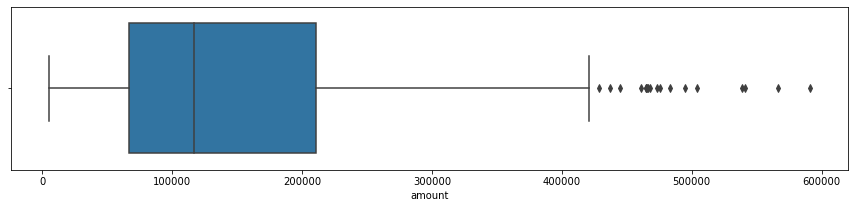

Feature amount : Mean = 151410.176, Median = 116928.0 and Inter-Quartile-Range (IQR) = 143922.0
There are 18 outliers (2.639 % of the data points) in amount feature and the values are [482940, 566640, 428784, 460980, 504000, 538500, 464520, 466608, 475680, 468060, 473280, 590820, 444864, 465072, 437460, 495180, 541200, 465504]
*****************************************************************************************************************************
******************************
Boxplot of A4 column : 
******************************


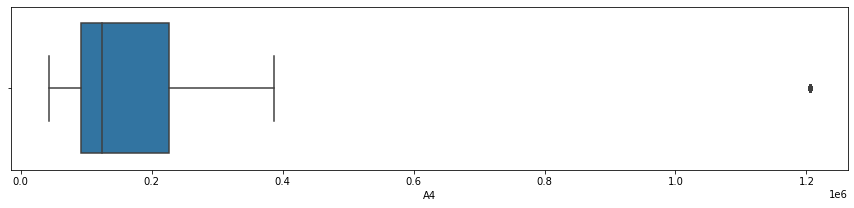

Feature A4 : Mean = 272052.236, Median = 124605.0 and Inter-Quartile-Range (IQR) = 134038.0
There are 84 outliers (12.317 % of the data points) in A4 feature and the values are [1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953]
******************************************************************

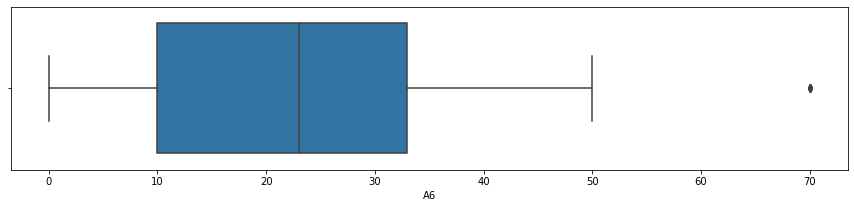

Feature A6 : Mean = 21.557, Median = 23.0 and Inter-Quartile-Range (IQR) = 23.0
There are 10 outliers (1.466 % of the data points) in A6 feature and the values are [70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
*****************************************************************************************************************************
******************************
Boxplot of A7 column : 
******************************


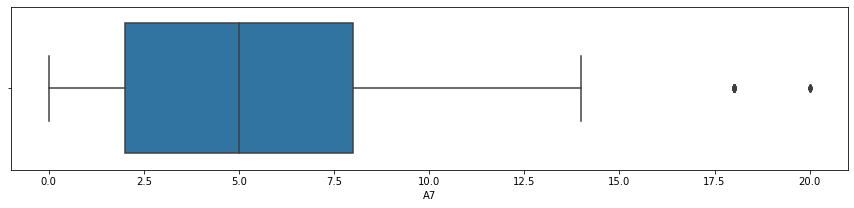

Feature A7 : Mean = 5.648, Median = 5.0 and Inter-Quartile-Range (IQR) = 6.0
There are 32 outliers (4.692 % of the data points) in A7 feature and the values are [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]
*****************************************************************************************************************************
******************************
Boxplot of A8 column : 
******************************


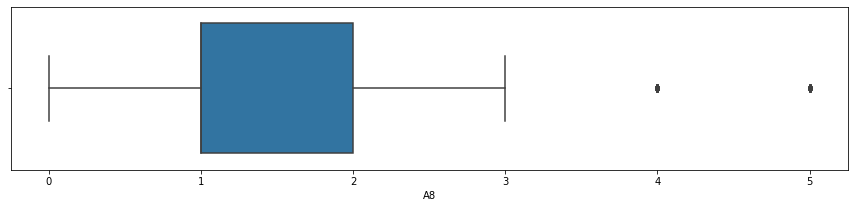

Feature A8 : Mean = 1.713, Median = 1.0 and Inter-Quartile-Range (IQR) = 1.0
There are 53 outliers (7.771 % of the data points) in A8 feature and the values are [4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
*****************************************************************************************************************************
******************************
Boxplot of A11 column : 
******************************


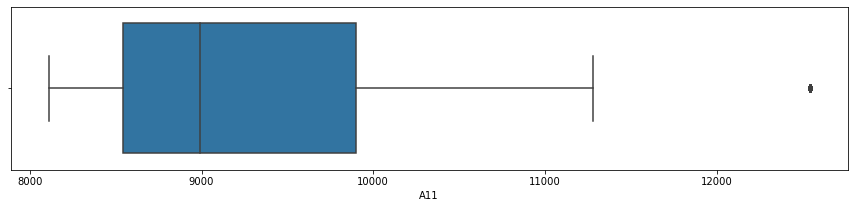

Feature A11 : Mean = 9502.987, Median = 8991.0 and Inter-Quartile-Range (IQR) = 1353.0
There are 84 outliers (12.317 % of the data points) in A11 feature and the values are [12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541, 12541]
*****************************************************************************************************************************
******************************
Boxplot of A13 column : 
******************************


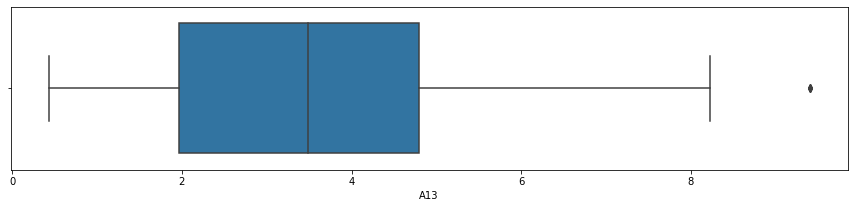

Feature A13 : Mean = 3.528, Median = 3.49 and Inter-Quartile-Range (IQR) = 2.83
There are 5 outliers (0.733 % of the data points) in A13 feature and the values are [9.4, 9.4, 9.4, 9.4, 9.4]
*****************************************************************************************************************************
******************************
Boxplot of A16 column : 
******************************


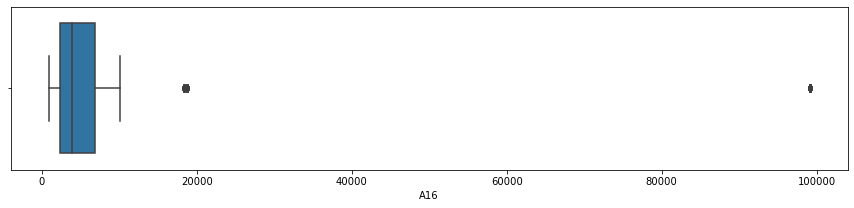

Feature A16 : Mean = 16390.818, Median = 3868.0 and Inter-Quartile-Range (IQR) = 4567.0
There are 128 outliers (18.768 % of the data points) in A16 feature and the values are [99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 99107, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18696, 18347, 18347, 18347, 18347, 18347, 18347, 18347, 18347, 18347, 18347

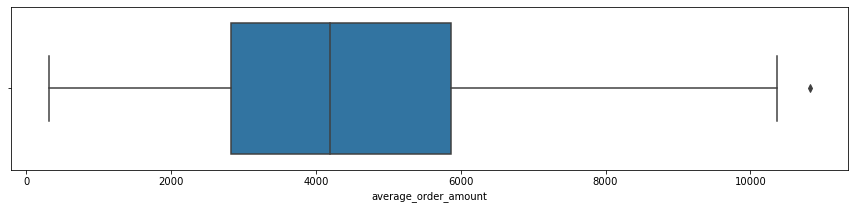

Feature average_order_amount : Mean = 4486.951, Median = 4193.617 and Inter-Quartile-Range (IQR) = 3039.533
There are 1 outliers (0.147 % of the data points) in average_order_amount feature and the values are [10817.0]
*****************************************************************************************************************************


C:\Users\aswin\AppData\Local\Temp/ipykernel_13724/3874139067.py:62: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,Column Name,Mean,Median,Lower Quartile,Upper Quartile,IQR,No of Outliers Present,Percentage of Outliers,Values of Outliers
0,client_id,7120.573,6941.0,3582.25,10711.0,7128.75,0,0.0 %,[]
1,disp_id,7002.702,6941.0,3582.25,10403.0,6820.75,0,0.0 %,[]
2,account_id,5824.163,5738.5,2967.0,8686.0,5719.0,0,0.0 %,[]
3,index,37.49,39.0,13.0,60.0,47.0,0,0.0 %,[]
4,loan_id,6172.466,6176.5,5577.5,6752.5,1175.0,0,0.0 %,[]
5,amount,151410.176,116928.0,66732.0,210654.0,143922.0,18,2.639 %,"[428784, 437460, 444864, 460980, 464520, 465072, 465504, 466608, 468060, 473280, 475680, 482940, 495180, 504000, 538500, 541200, 566640, 590820]"
6,duration,36.493,36.0,24.0,48.0,24.0,0,0.0 %,[]
7,payments,4190.664,3934.0,2477.0,5813.5,3336.5,0,0.0 %,[]
8,A4,272052.236,124605.0,92084.0,226122.0,134038.0,84,12.317 %,"[1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953, 1204953]"
9,A5,39.673,35.0,5.0,65.0,60.0,0,0.0 %,[]


In [56]:
showOutliers(main_df)

In [59]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   client_id              682 non-null    int64         
 1   disp_id                682 non-null    int64         
 2   account_id             682 non-null    int64         
 3   index                  682 non-null    int64         
 4   loan_id                682 non-null    int64         
 5   date                   682 non-null    datetime64[ns]
 6   amount                 682 non-null    int64         
 7   duration               682 non-null    int64         
 8   payments               682 non-null    float64       
 9   status                 682 non-null    object        
 10  frequency              682 non-null    object        
 11  date_account           682 non-null    datetime64[ns]
 12  A2                     682 non-null    object        
 13  A3   

In [61]:
main_df.head().T

,0,1,2,3,4
client_id,13539,11126,2,9173,3001
disp_id,13231,10818,2,8865,3001
account_id,11013,9034,2,7401,2486
index,1,1,1,1,1
loan_id,7240,6820,4959,6499,5479
date,1993-09-06 00:00:00,1993-12-16 00:00:00,1994-01-05 00:00:00,1994-01-05 00:00:00,1994-01-10 00:00:00
amount,274740,38148,80952,80952,24516
duration,60,12,24,24,12
payments,4579.0,3179.0,3373.0,3373.0,2043.0
status,A,A,A,A,A
